In [57]:
!pip install imblearn

     |████████████████████████████████| 189 kB 805 kB/s eta 0:00:01


In [22]:
# necessary imports for the solution
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from nltk import word_tokenize
import string
from nltk.probability import FreqDist
import random
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
amazon_reviews_train = pd.read_csv('amazon_reviews_train.csv')
amazon_reviews_test = pd.read_csv('amazon_reviews_test.csv')
# This done to make the basic pre processing for all documents
amazon_reviews = pd.concat([amazon_reviews_train, amazon_reviews_test])

In [5]:
amazon_reviews.head()

,sentiment,review
0,negative,Product arrived labeled as Jumbo Salted Peanut...
1,positive,This is a confection that has been around a fe...
2,negative,If you are looking for the secret ingredient i...
3,positive,Great taffy at a great price. There was a wid...
4,positive,This saltwater taffy had great flavors and was...


In [9]:
print(amazon_reviews.shape)
print(amazon_reviews.info())
amazon_reviews_copy.isnull().sum()

(51319, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51319 entries, 0 to 2416
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  51319 non-null  object
 1   review     51319 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


sentiment    0
review       0
dtype: int64

As we can see here, we Don’t have nulls in our rows.

In [8]:
#creating a copy for pre processing
amazon_reviews_copy = amazon_reviews.copy()

In [13]:
amazon_reviews_copy['sentiment'].value_counts()

positive    39511
negative    11808
Name: sentiment, dtype: int64

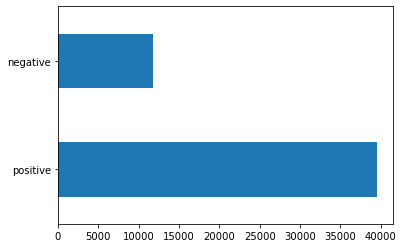

In [43]:
plot=amazon_reviews_copy['sentiment'].value_counts().plot(kind='barh')

This dataset is a little bit unbalanced...

In [53]:
# This stratified sampling is important to guarantee the same class balance in train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(amazon_reviews_copy, test_size = 0.2, stratify=amazon_reviews_copy.sentiment)

In [54]:
train['sentiment'].value_counts()

positive    31609
negative     9446
Name: sentiment, dtype: int64

In [55]:
test['sentiment'].value_counts()

positive    7902
negative    2362
Name: sentiment, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE().fit_resample(train[['sentiment']], train['sentiment'])


ValueError: could not convert string to float: 'negative'

In [ ]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='buy')